<a href="https://colab.research.google.com/github/Cbosugobux/projectFour/blob/Rosy/Team4ProjectRadarcharts_(2).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#import dependencies
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

In [3]:
# Load the dataset
df = pd.read_csv("03172025TeamBasicStats.csv")

sweet16 = ["Duke", "Florida", "Houston", "Auburn", "Tennessee", "Michigan State", "Texas Tech", "Maryland", "Arizona", "Brigham Young", "Arkansas", "Kentucky", "UCLA", "Connecticut", "Creighton", "Drake" ]

df = df[df["School"].isin(sweet16)].set_index("School")
print(df.columns)
df.head()

Index(['Rk', 'G', 'W', 'L', 'W-L%', 'SRS', 'SOS', 'Unnamed: 8', 'W.1', 'L.1',
       'Unnamed: 11', 'W.2', 'L.2', 'Unnamed: 14', 'W.3', 'L.3', 'Unnamed: 17',
       'Tm.', 'Opp.', 'Unnamed: 20', 'MP', 'FG', 'FGA', 'FG%', '3P', '3PA',
       '3P%', 'FT', 'FTA', 'FT%', 'ORB', 'TRB', 'AST', 'STL', 'BLK', 'TOV',
       'PF'],
      dtype='object')


,Rk,G,W,L,W-L%,SRS,SOS,Unnamed: 8,W.1,L.1,...,FT,FTA,FT%,ORB,TRB,AST,STL,BLK,TOV,PF
School,,,,,,,,,,,,,,,,,,,,,
Arizona,11,34,22,12,0.647,23.12,13.82,NaN,14,6,...,593,756,0.784,416,1346,554,262,146,390,566
Arkansas,13,33,20,13,0.606,16.64,11.18,NaN,8,10,...,501,683,0.734,304,1165,477,251,186,385,532
Auburn,17,33,28,5,0.848,29.57,15.33,NaN,15,3,...,504,681,0.740,385,1223,544,230,204,305,614
Brigham Young,30,33,24,9,0.727,19.80,9.71,NaN,14,6,...,419,594,0.705,366,1237,569,236,104,400,532
Connecticut,60,33,23,10,0.697,17.83,8.47,NaN,14,6,...,457,578,0.791,365,1175,580,175,210,370,593


In [9]:
# Select metrics for radar chart
metrics = ["W-L%", "SRS", "SOS", "AST", "TOV", "FG%", "FT%"]

In [8]:
# Normalize the data
scaler = MinMaxScaler()
df_scaled = df.copy()
df_scaled[metrics] = scaler.fit_transform(df[metrics])

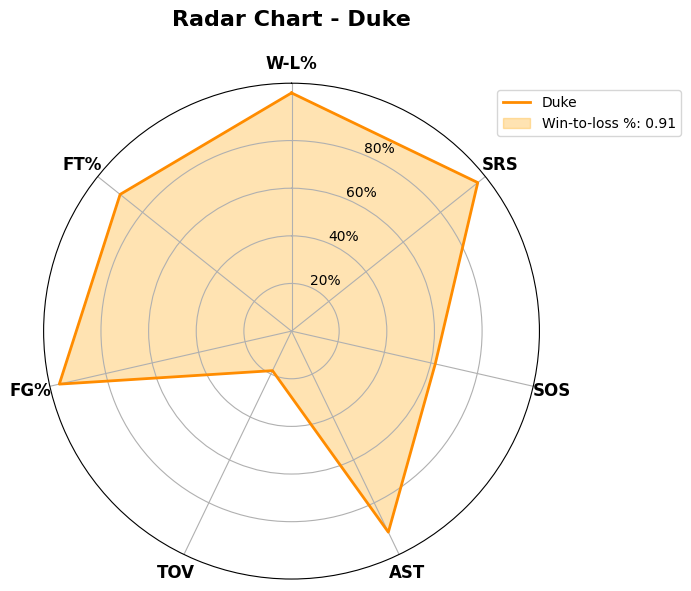

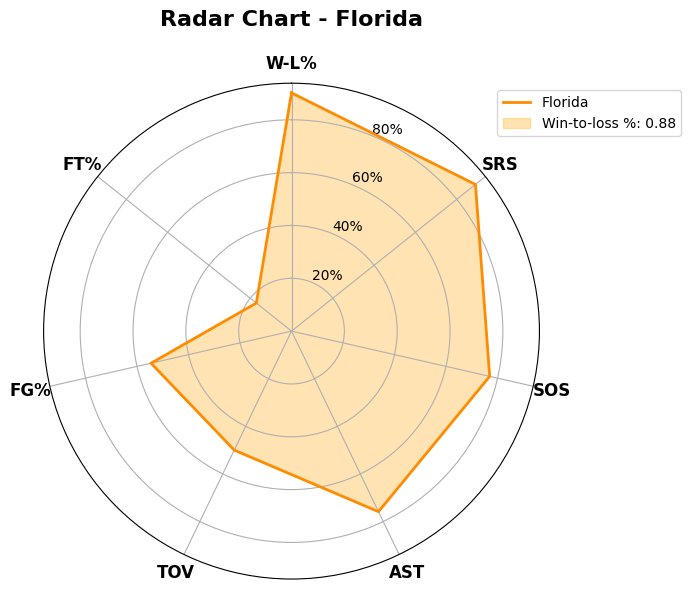

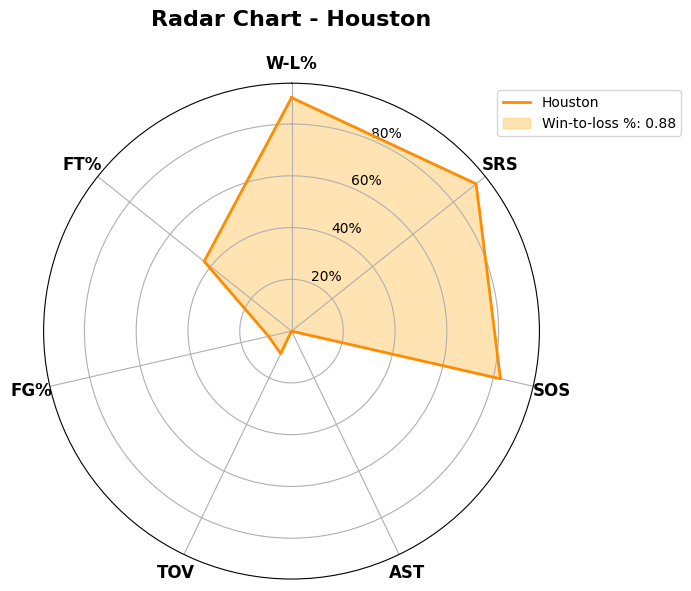

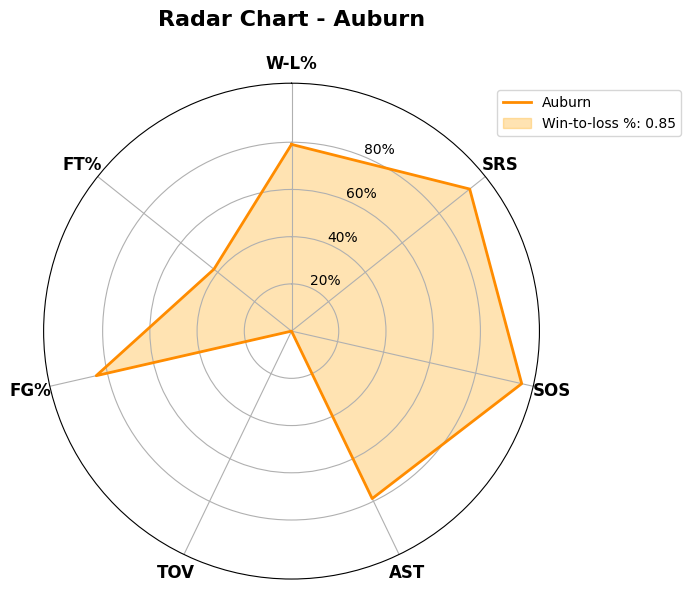

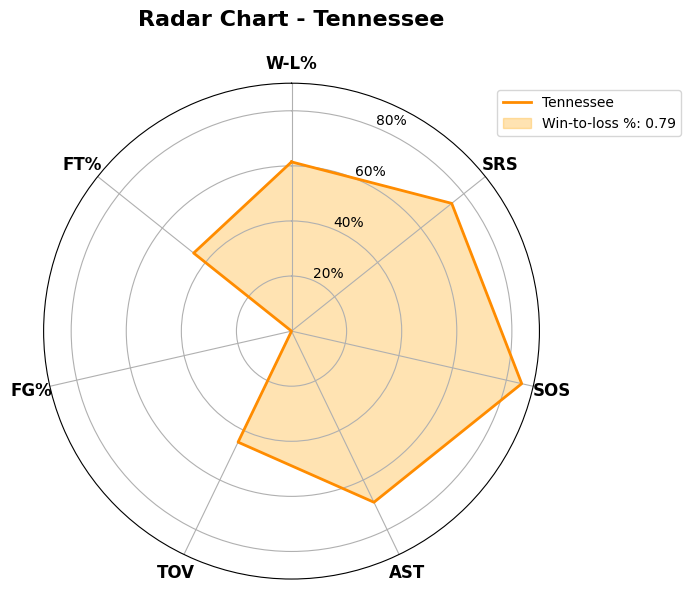

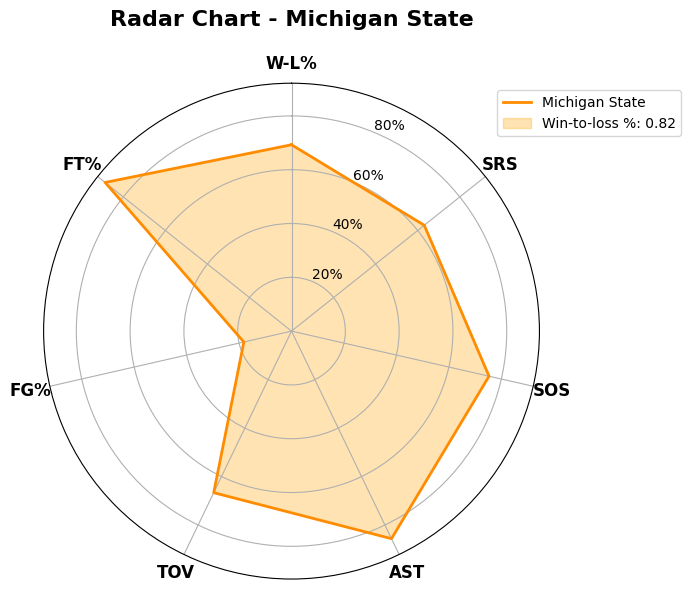

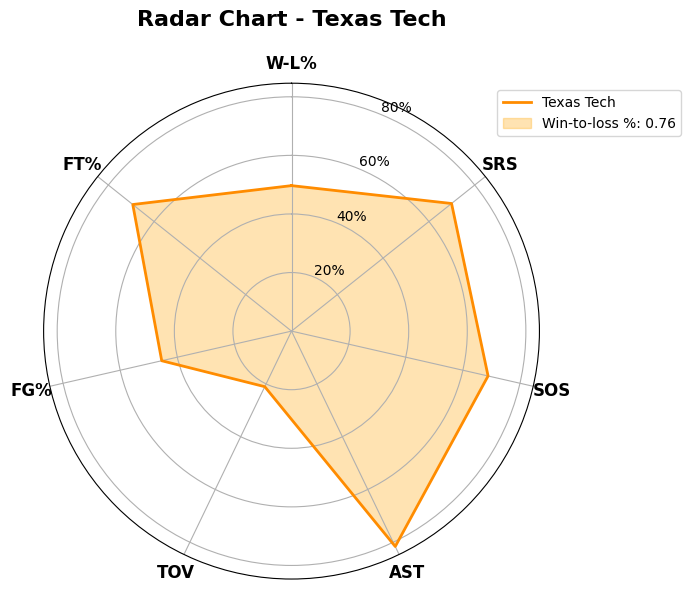

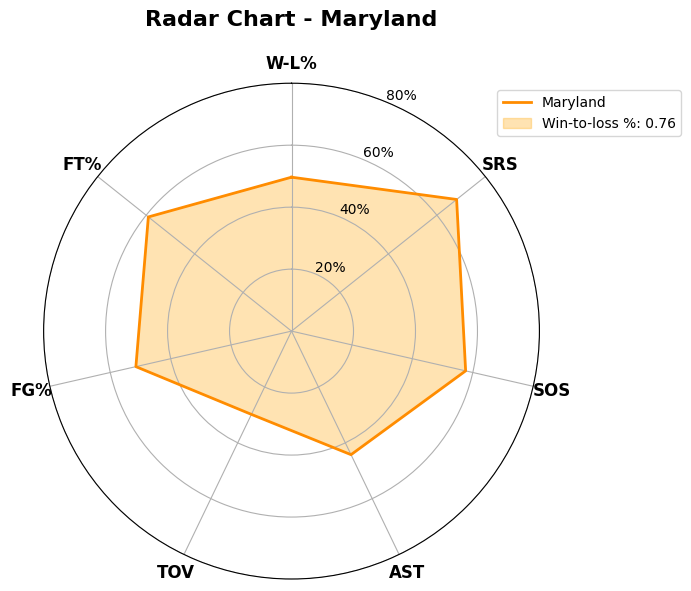

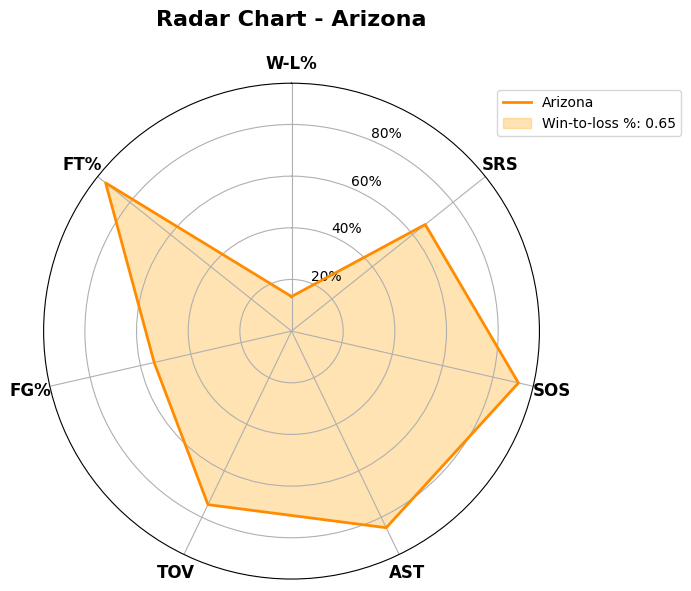

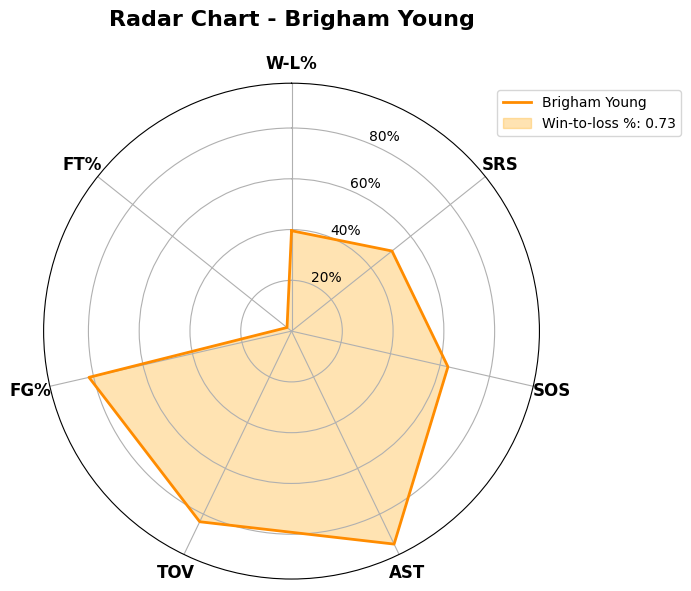

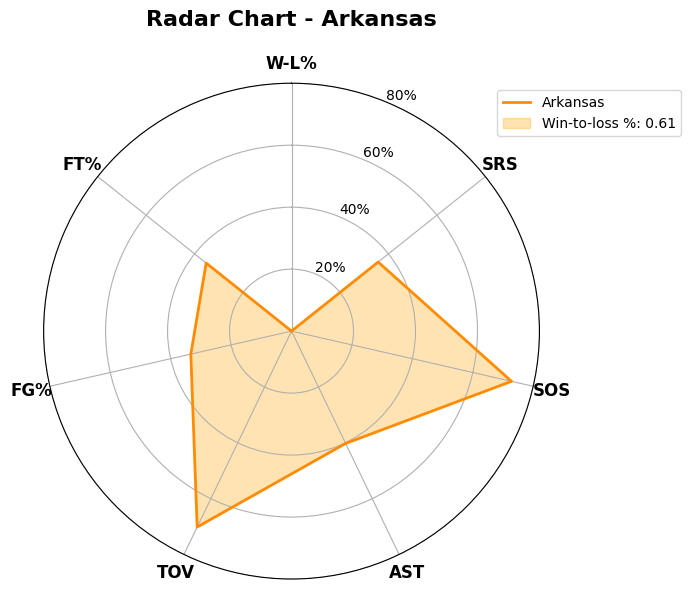

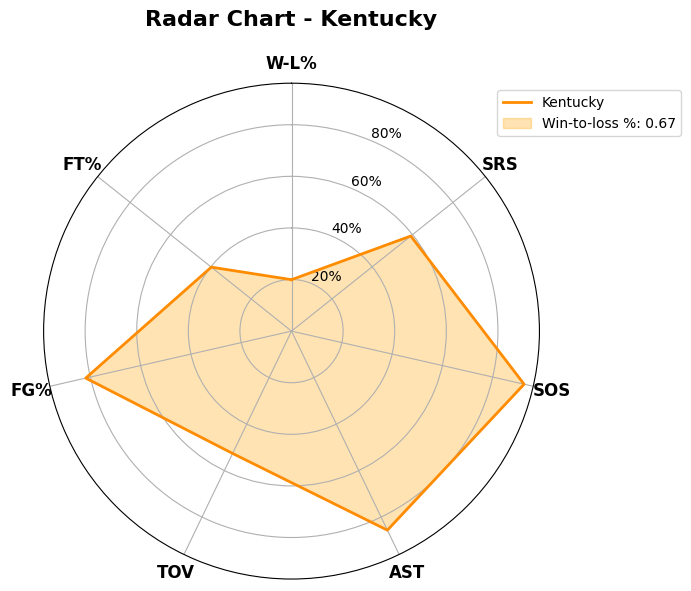

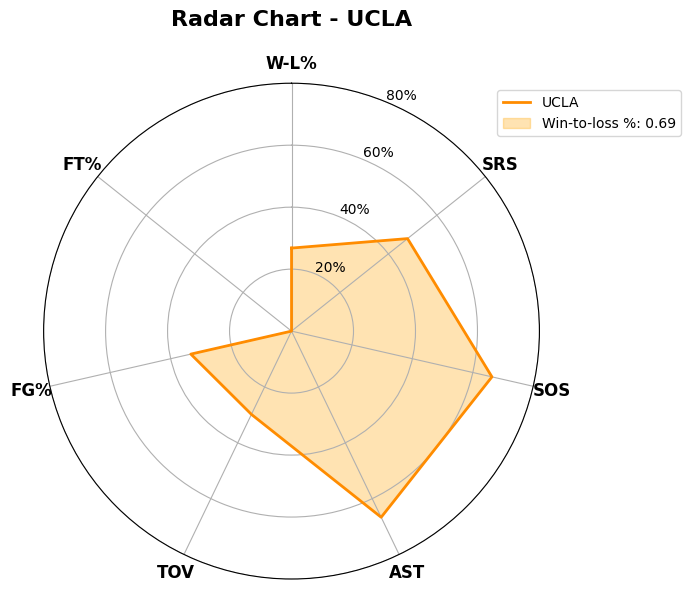

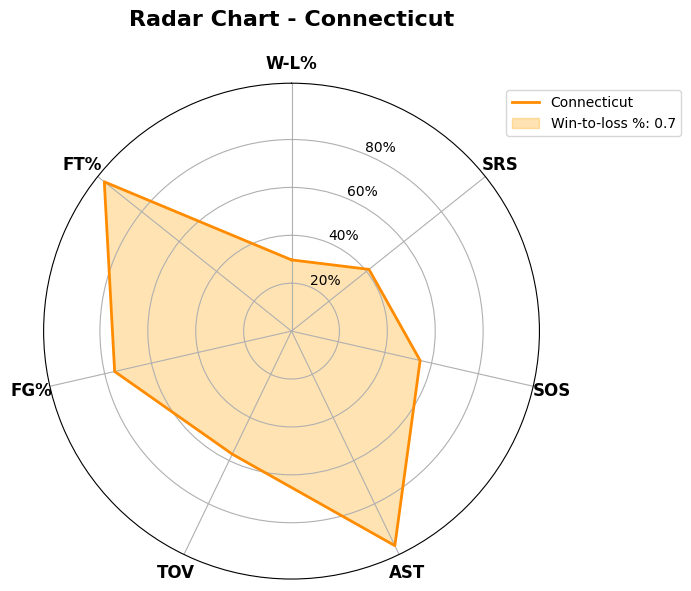

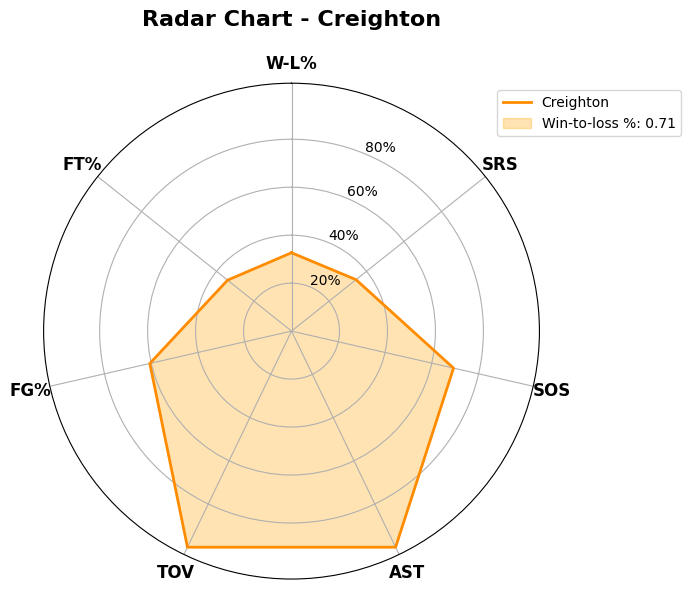

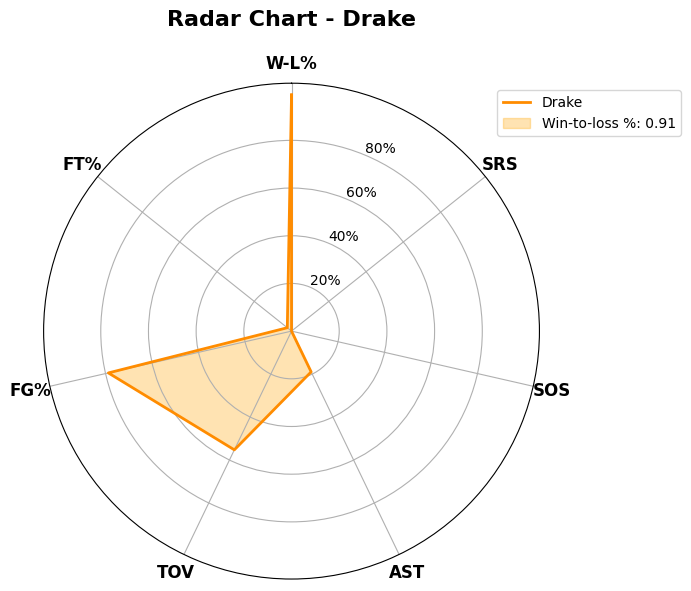

In [11]:
# Radar Chart Function with Legend
def plot_radar(team):
    values = df_scaled.loc[team, metrics].tolist()
    values += values[:1]  # Close the radar loop

    # Actual values for legend
    raw_values = df.loc[team, metrics].tolist()

    angles = np.linspace(0, 2 * np.pi, len(metrics), endpoint=False).tolist()
    angles += angles[:1]

    fig, ax = plt.subplots(figsize=(7, 6), subplot_kw=dict(polar=True))

    # Plot radar
    ax.plot(angles, values, color='darkorange', linewidth=2)
    ax.fill(angles, values, color='orange', alpha=0.3)

    # Format
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(metrics, fontsize=12, fontweight='bold')
    ax.set_yticks([0.2, 0.4, 0.6, 0.8])
    ax.set_yticklabels(['20%', '40%', '60%', '80%'], fontsize=10)
    ax.set_title(f"Radar Chart - {team}", size=16, weight='bold', y=1.1)
    ax.grid(True)

    # LEGEND with raw values
    metric_explained = {
        "W-L%": "Win-to-loss %",
        "SRS": "Team strength",
        "SOS": "Schedule strength",
        "AST": "Assists",
        "TOV": "Turnovers",
        "FG%": "Field Goals",
        "FT%": "Free Throws"
    }

    legend_text = [f"{metric_explained[m]}: {round(v, 2)}" for m, v in zip(metrics, raw_values)]
    plt.legend([f"{team}"] + legend_text, loc="upper right", bbox_to_anchor=(1.3, 1.0), fontsize=10)

    plt.tight_layout()
    plt.show()

# Display plot
for team in sweet16:
    plot_radar(team)
